In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.cross_validation import train_test_split

In [2]:
def eval_metric(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse = make_scorer(eval_metric, greater_is_better=False)

In [3]:
train = pd.read_csv('../data/Train_UWu5bXk.csv')
test = pd.read_csv('../data/Test_u94Q5KV.csv')

In [7]:
## mapping
item_sales_map = train.groupby('Item_Identifier').Item_Outlet_Sales.mean().to_dict()
item_sales_median = train.groupby('Item_Identifier').Item_Outlet_Sales.median().to_dict()

In [9]:
X = train[train.columns.drop('Item_Outlet_Sales')]
y = train.Item_Outlet_Sales

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [36]:
def get_predictions(item_ids, mapping, factor=1.):
    return np.array([factor * mapping[item_id] for item_id in item_ids])    

In [26]:
train_predictions = get_predictions(X_train.Item_Identifier, item_sales_map, factor=.9)
test_predictions = get_predictions(X_test.Item_Identifier, item_sales_map, factor=.9)

In [27]:
print 'RMSE on the training examples %f ' %(eval_metric(y_train, train_predictions))
print 'RMSE on the test examples %f ' %(eval_metric(y_test, test_predictions))

RMSE on the training examples 1326.179141 
RMSE on the test examples 1267.615908 


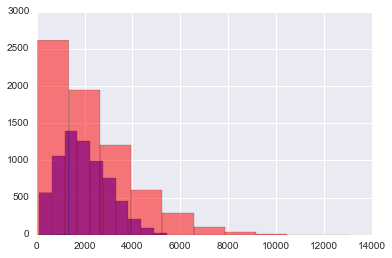

In [28]:
plt.hist(train_predictions, alpha=0.7, color='b')
plt.hist(y_train, color='r', alpha=.5);

## Analyze different factors

In [31]:
factors = np.linspace(0.6, 1.1, 20)

In [45]:
errors = []
for factor in factors:
    predictions = get_predictions(train.Item_Identifier, item_sales_median, factor=factor)
    errors.append(eval_metric(train.Item_Outlet_Sales, predictions))

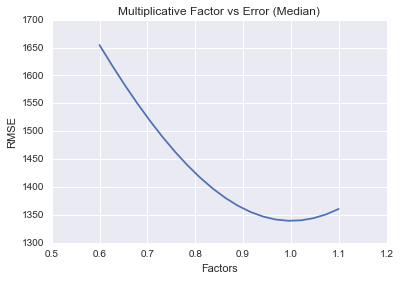

In [47]:
plt.plot(factors, errors)
plt.xlabel('Factors')
plt.ylabel('RMSE')
plt.title('Multiplicative Factor vs Error (Median)');

In [49]:
errors = []
for factor in factors:
    predictions = get_predictions(train.Item_Identifier, item_sales_map, factor=factor)
    errors.append(eval_metric(train.Item_Outlet_Sales, predictions))

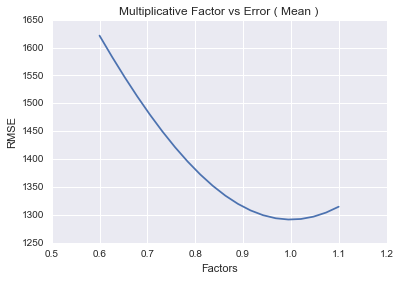

In [50]:
plt.plot(factors, errors)
plt.xlabel('Factors')
plt.ylabel('RMSE')
plt.title('Multiplicative Factor vs Error ( Mean )');

In [74]:
mapping = train.groupby(['Item_Identifier', 'Outlet_Type']).Item_Outlet_Sales.mean().to_dict()

In [91]:
def get_predictions(item_ids, outlet_types, mapping, item_map, factor=1.):
    predictions = []
    for item_id, outlet_type in zip(item_ids, outlet_types):
        if (item_id, outlet_type) in mapping:
            predictions.append(factor * mapping[(item_id, outlet_type)])
        else:
            predictions.append(item_map[item_id])
    
    return np.array(predictions)

In [92]:
errors = []
for factor in factors:
    predictions = get_predictions(train.Item_Identifier, train.Outlet_Type, mapping, item_sales_map, factor=factor)
    errors.append(eval_metric(train.Item_Outlet_Sales, predictions))

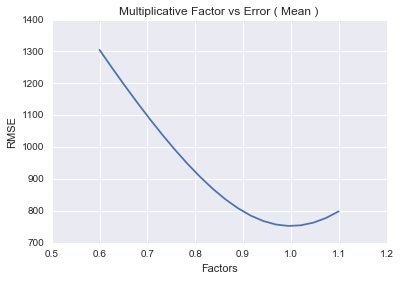

In [77]:
plt.plot(factors, errors)
plt.xlabel('Factors')
plt.ylabel('RMSE')
plt.title('Multiplicative Factor vs Error ( Mean )');

## Create Submission

In [94]:
predictions = get_predictions(test.Item_Identifier, test.Outlet_Type, mapping, item_sales_map, factor=0.99473684)

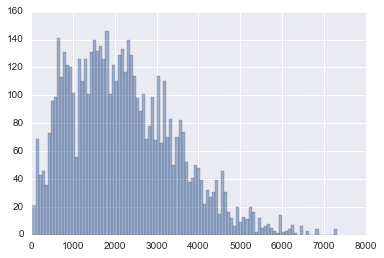

In [96]:
plt.hist(predictions, bins=100, alpha=0.5);

In [98]:
submission = pd.read_csv('../data/SampleSubmission_TmnO39y.csv'); 
submission.loc[:, 'Item_Outlet_Sales'] = predictions

In [99]:
submission.to_csv('../submissions/base_submission.csv', index=False);